## Overview

This notebook aims to demonstrate the power of Logistic Regression model from the Statsmodel package in data analysis. We'll compare Sci-kit learn's Logistic Regression model with that of Statsmodel. This notebook also serves as a demonstartion of crucial ML and statistics concepts.

**<ins>Business Objective</ins>**: Identifying high-risk customers that are likely to churn in order to target them with marketing campaigns.
<br><br>
*Concepts Covered* -

    1. Exploratory Data Analysis
        1.1 Data Overview
        1.2 Feature Engineering
        1.3 Hypothesis Testing
        1.4 Pearson correlation
        
    2. Model Building
        2.1 Logistic Regression - Scikit-learn
        2.2 Logistic Regression - Statsmodel
        
    3. Model Evaluation
        3.1 ROC-AUC Curve
        3.2 Recall - Precision Curve

    4. Model Interpretation
        4.1 R-Square
        4.2 Pseudo R-square
        4.3 Odds Ratio
        
    5. Making Business Decisions
        5.1 Benchmark
        5.2 Gain
        5.3 Lift
        
        
- Dataset - [Telecom Churn Dataset](https://www.kaggle.com/code/mnassrib/customer-churn-prediction-telecom-churn-dataset/data)

## **EDA**

Task: 
1. Handling outliers and missing values
2. Finding variables that has some relation to target variable
3.  Handling Multicollinearity among the varaibles

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
churn = pd.read_csv("churn.csv")

In [3]:
churn

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7            

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
# no null values
# Target variable is Churn, converting it to int values (0,1)
churn.Churn = churn.Churn.replace({True: 1, False: 0})
churn["Voice mail plan"] = churn["Voice mail plan"].replace({"Yes": 1, "No": 0})
churn["International plan"] = churn["International plan"].replace({"Yes": 1, "No": 0})

In [6]:
#dropping columns that are not essential
churn = churn.drop(['State', 'Area code'], axis = 1)

In [7]:
churn.Churn.value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='Account length'>

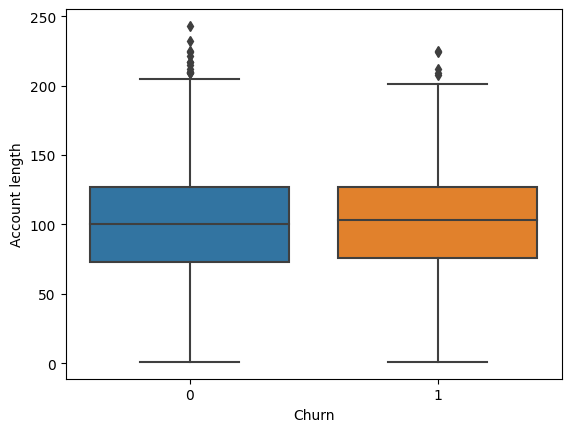

In [9]:
#EDA to select the variables
sns.boxplot(x = "Churn", y = "Account length", data = churn)

- Visually we see that account length has no effect on churn
- We can verify this by an independent t-test (For Demonstration, only effect of one variable on target variable is tested)

In [11]:

a = churn["Account length"][churn["Churn"] == 1]
b = churn["Account length"][churn["Churn"] == 0]

stats.ttest_ind(a = a, b = b)

Ttest_indResult(statistic=0.9547765176420727, pvalue=0.3397600070563823)

**Analysis of the t-test**
- We have the following hypothesis :

     - h0 : mean of Account lenght of people that churned == mean of Account lenght of people that did not churned
     - ha : mean of Account lenght of people that churned != mean of Account lenght of people that did not churned
 
Since pvalue > 0.05, we cannot reject the null hypothesis.
(pvalue is the probability of making type-I error)

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

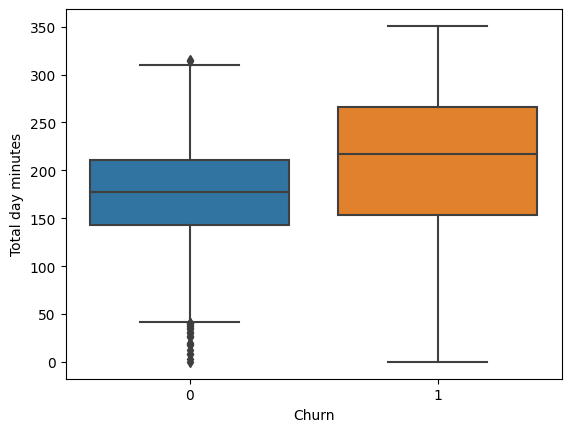

In [13]:
sns.boxplot(x = "Churn", y = "Total day minutes", data = churn)

<AxesSubplot:xlabel='Churn', ylabel='Total night minutes'>

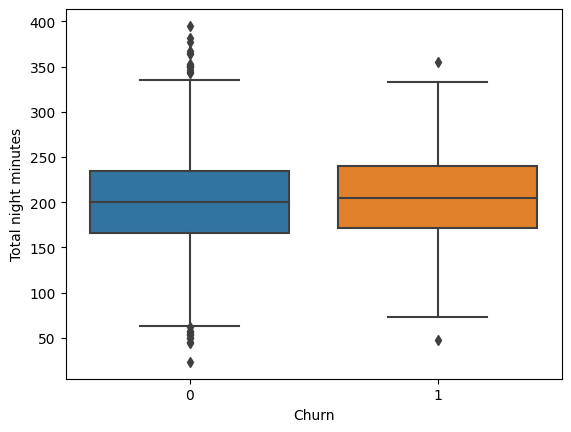

In [14]:
sns.boxplot(x = "Churn", y = "Total night minutes", data = churn)

## Observations so far
1. No missing values.
2. Data is imbalanced : <br><br>
    * 1 - 14.49%   (for now we will use the imbalanced dataset to evaluate the models)
    * 0 - 85.55%   (A balanced dataset will have atleat 70%-30% distribution)
<br><br>
3. People having higher day usage are leaving the service. Maybe the they are going to a competitor that offers lower prices on higher usage.
4. There is no effect of duration of night usage on churn.


In [16]:
# Search for mutlicollinearity

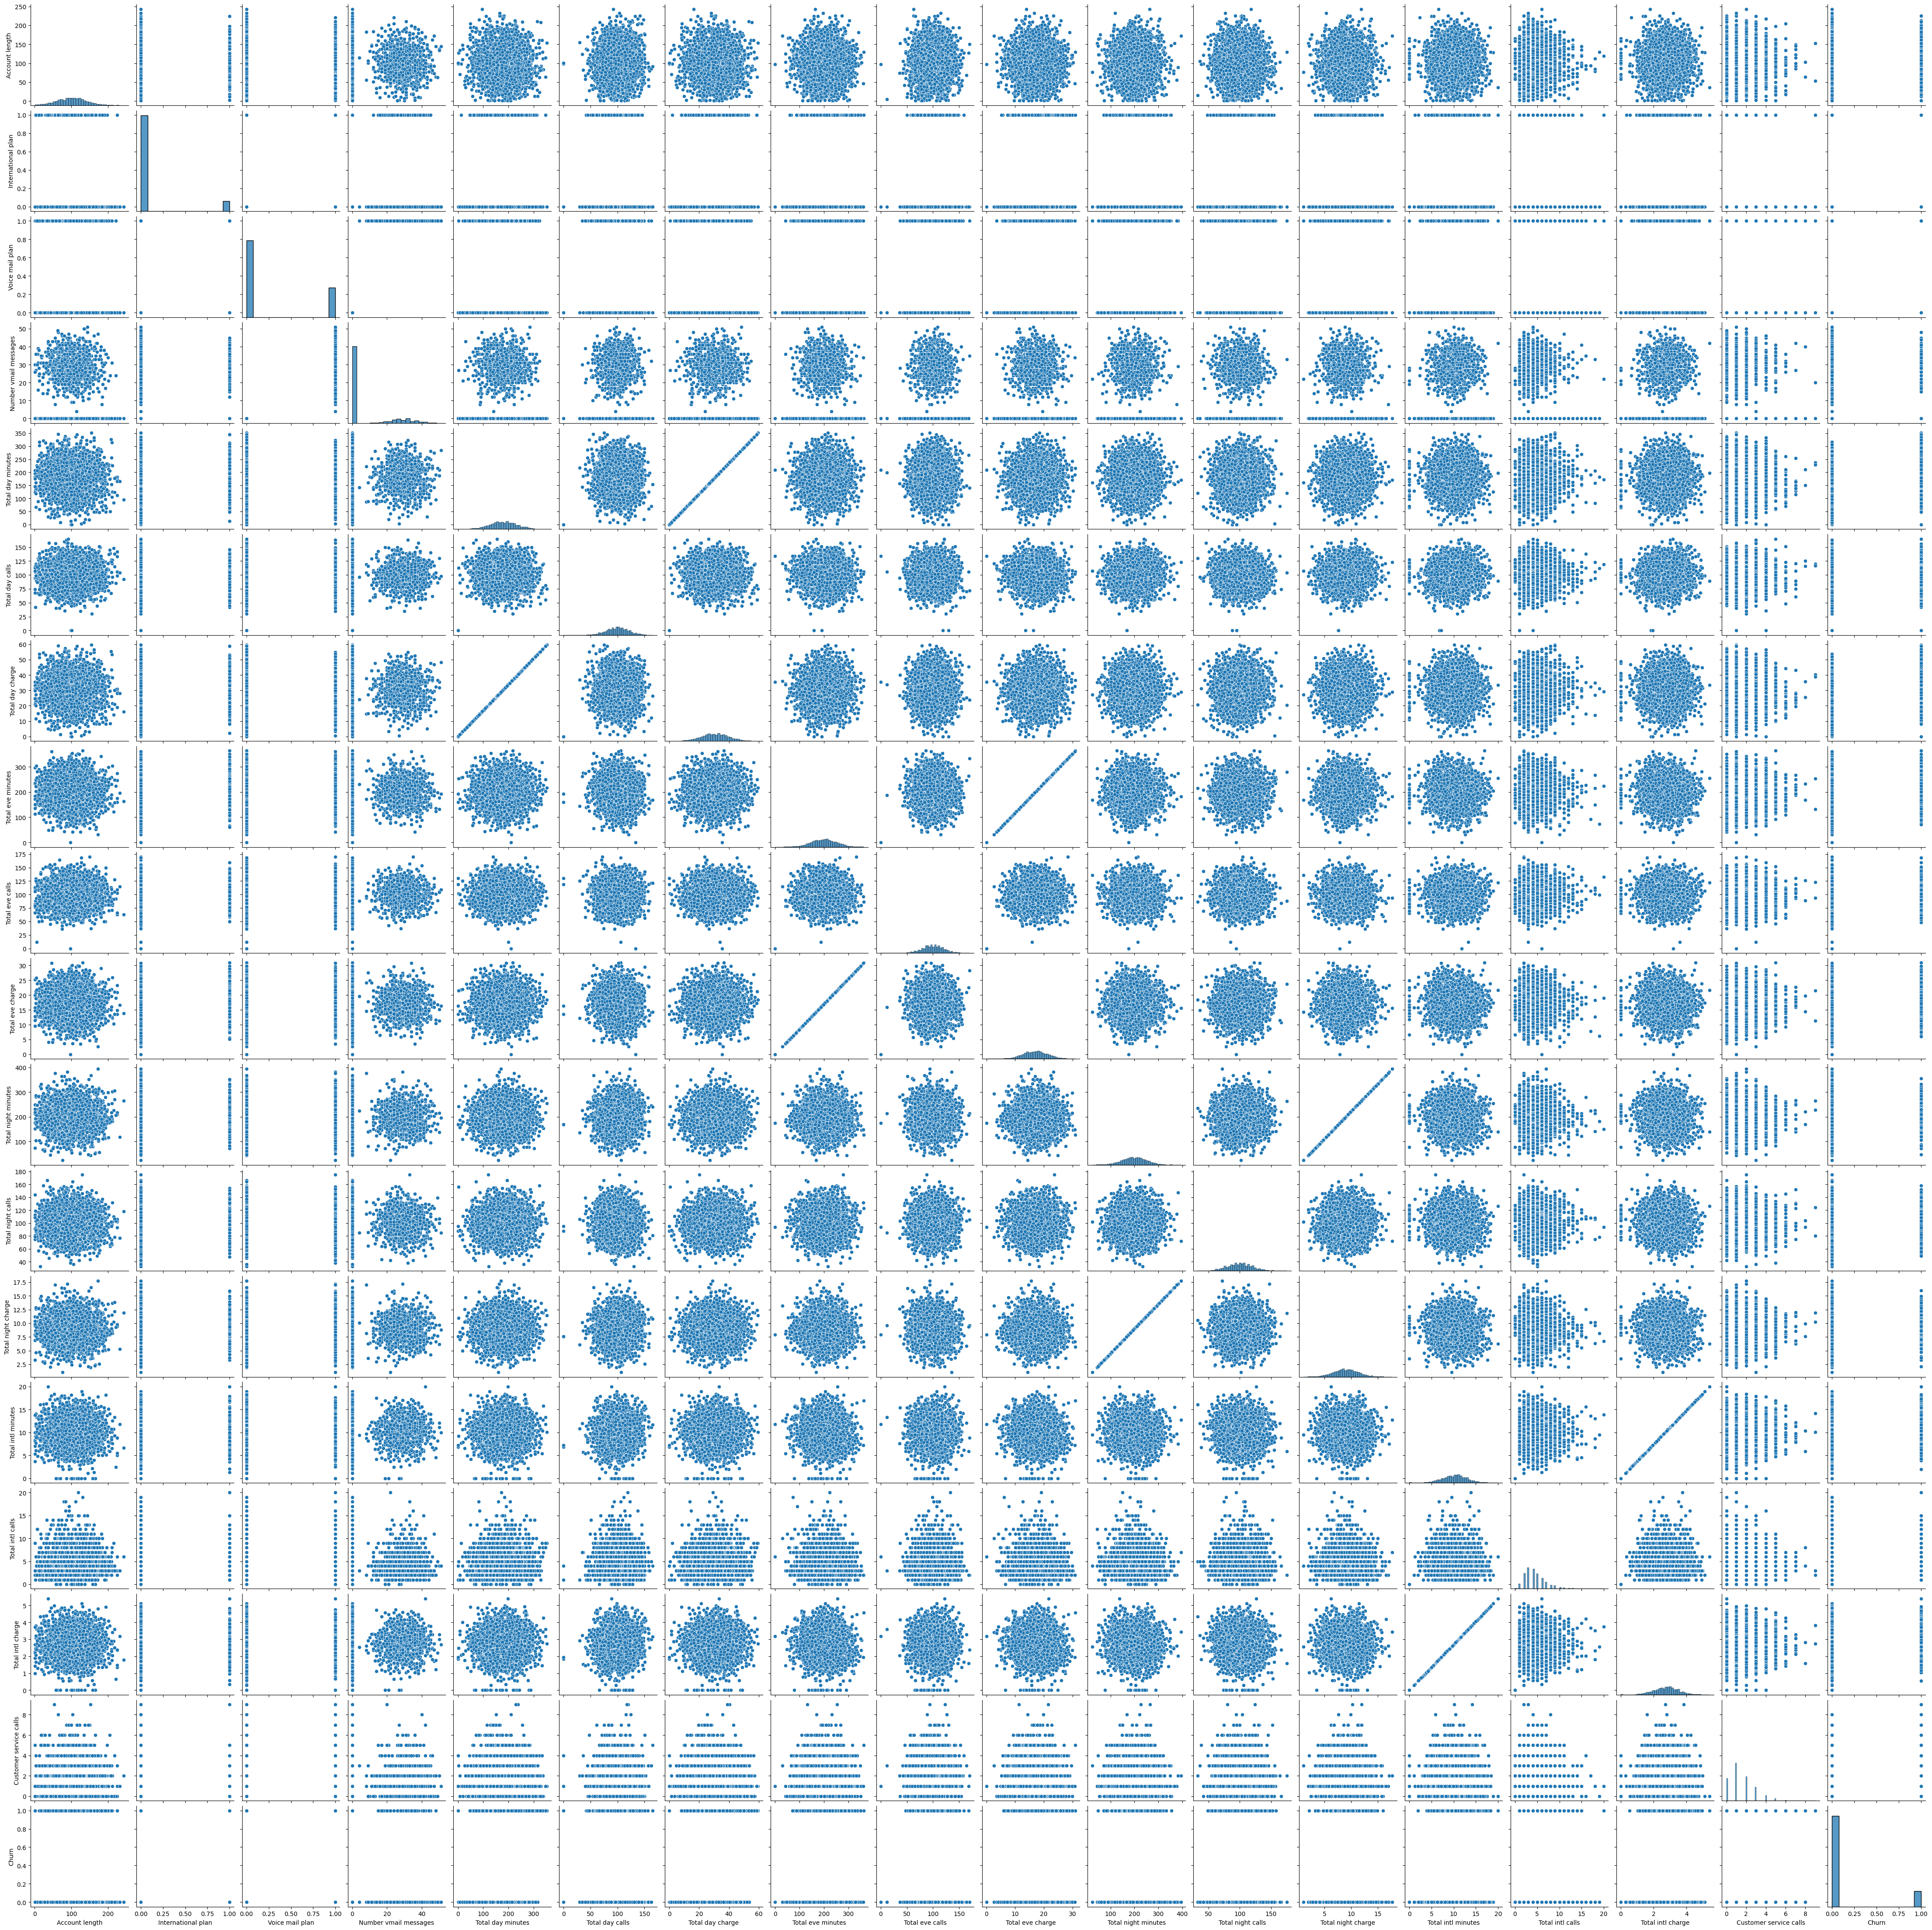

In [20]:
sns.pairplot(churn)

In [21]:
churn.corr()

Account length  International plan  Voice mail plan  \
Account length                1.000000            0.024735         0.002918   
International plan            0.024735            1.000000         0.006006   
Voice mail plan               0.002918            0.006006         1.000000   
Number vmail messages        -0.004628            0.008745         0.956927   
Total day minutes             0.006216            0.049396        -0.001684   
Total day calls               0.038470            0.003755        -0.011086   
Total day charge              0.006214            0.049398        -0.001686   
Total eve minutes            -0.006757            0.019100         0.021545   
Total eve calls               0.019260            0.006114        -0.006444   
Total eve charge             -0.006745            0.019106         0.021559   
Total night minutes          -0.008955           -0.028905         0.006079   
Total night calls            -0.013176            0.012451         0.015553   
Total night charge           -0.008960           -0.028913         0.006064   
Total intl minutes            0.009514            0.045871        -0.001318   
Total intl calls              0.020661            0.017366         0.007618   
Total intl charge             0.009546            0.045780        -0.001276   
Customer service calls       -0.003796           -0.024522        -0.017824   
Churn                         0.016541            0.259852        -0.102148   

                        Number vmail messages  Total day minutes  \
Account length                      -0.004628           0.006216   
International plan                   0.008745           0.049396   
Voice mail plan                      0.956927          -0.001684   
Number vmail messages                1.000000           0.000778   
Total day minutes                    0.000778           1.000000   
Total day calls                     -0.009548           0.006750   
Total day charge                     0.000776           1.000000   
Total eve minutes                    0.017562           0.007043   
Total eve calls                     -0.005864           0.015769   
Total eve charge                     0.017578           0.007029   
Total night minutes                  0.007681           0.004323   
Total night calls                    0.007123           0.022972   
Total night charge                   0.007663           0.004300   
Total intl minutes                   0.002856          -0.010155   
Total intl calls                     0.013957           0.008033   
Total intl charge                    0.002884          -0.010092   
Customer service calls              -0.013263          -0.013423   
Churn                               -0.089728           0.205151   

                        Total day calls  Total day charge  Total eve minutes  \
Account length                 0.038470          0.006214          -0.006757   
International plan             0.003755          0.049398           0.019100   
Voice mail plan               -0.011086         -0.001686           0.021545   
Number vmail messages         -0.009548          0.000776           0.017562   
Total day minutes              0.006750          1.000000           0.007043   
Total day calls                1.000000          0.006753          -0.021451   
Total day charge               0.006753          1.000000           0.007050   
Total eve minutes             -0.021451          0.007050           1.000000   
Total eve calls                0.006462          0.015769          -0.011430   
Total eve charge              -0.021449          0.007036           1.000000   
Total night minutes            0.022938          0.004324          -0.012584   
Total night calls             -0.019557          0.022972           0.007586   
Total night charge             0.022927          0.004301          -0.012593   
Total intl minutes             0.021565         -0.010157          -0.011035   
Total intl calls             

<ins>*Note*</ins>:
- Correlation is measured between two continuous variables
- Variables like 'Total day charge' and 'Total day minutes' are perfectly correlated. 
- This is no surprise because the duration is used to bill the customer.
- Our task would be reduce multicollinearity or better performance of the model. However for model evaluation, the model will be bult on all features first

## Model Building

In [18]:
target = churn["Churn"]
X = churn.drop(["Churn"], axis = 1)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 1)

In [20]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)  #Standardization has not been done because, we will evaluate the co-efficients later

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*The warning is because of multicollinearity, some of perfectly collinear data was not removed.*

In [22]:
X_train_sm = sm.add_constant(X_train) #if this constant for intercept is not added, the line will be forced to go through the origin which may not be the best fit.

sm_model = sm.Logit(y_train, X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.320438
         Iterations 7


In [23]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2648
Method:                           MLE   Df Model:                           17
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                  0.2277
Time:                        13:04:51   Log-Likelihood:                -854.29
converged:                       True   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                 3.294e-96
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.1520      0.810    -11.303      0.000     -10.739      -7.565
Account length             0.0014      0.002      0.906      0.365      -0.002       0.005
Inte

### <ins>Analysis of the summary</ins> - 
1. Pseudo R-squ = 1 - (Log-Likelihood/LL-Null), It is similar to R-squ. For this model it is 0.23 which is very low. It is low beacuase multicollinearity exists and we haven't treated it yet.
2. We observe that a lot of features have p-value less than 0.05, it shows multicollinearity and hence can be dropped to increase the model performance

In [25]:
# Extracting the summary in a dataframe and analyzing the odds ratio - 
coef_sm = pd.read_html(sm_model.summary().tables[1].as_html(),header = 0, index_col = 0)[0]
coef_sm["odds_ratio"] = np.exp(coef_sm["coef"])
coef_sm

coef  std err       z  P>|z|  [0.025  0.975]  \
const                   -9.1520    0.810 -11.303  0.000 -10.739  -7.565   
Account length           0.0014    0.002   0.906  0.365  -0.002   0.005   
International plan       1.9812    0.162  12.195  0.000   1.663   2.300   
Voice mail plan         -1.3977    0.660  -2.118  0.034  -2.691  -0.104   
Number vmail messages    0.0134    0.021   0.634  0.526  -0.028   0.055   
Total day minutes        3.1475    3.698   0.851  0.395  -4.100  10.395   
Total day calls          0.0040    0.003   1.320  0.187  -0.002   0.010   
Total day charge       -18.4311   21.753  -0.847  0.397 -61.065  24.203   
Total eve minutes        1.0964    1.849   0.593  0.553  -2.527   4.720   
Total eve calls          0.0010    0.003   0.328  0.743  -0.005   0.007   
Total eve charge       -12.8092   21.749  -0.589  0.556 -55.437  29.819   
Total night minutes     -0.6596    0.988  -0.668  0.504  -2.595   1.276   
Total night calls        0.0015    0.003   0.461  0.645  -0.005   0.008   
Total night charge      14.7454   21.946   0.672  0.502 -28.268  57.759   
Total intl minutes      -0.5141    5.946  -0.086  0.931 -12.168  11.139   
Total intl calls        -0.1001    0.029  -3.507  0.000  -0.156  -0.044   
Total intl charge        2.2186   22.020   0.101  0.920 -40.940  45.377   
Customer service calls   0.5051    0.044  11.364  0.000   0.418   0.592   

                          odds_ratio  
const                   1.060076e-04  
Account length          1.001401e+00  
International plan      7.251439e+00  
Voice mail plan         2.471648e-01  
Number vmail messages   1.013490e+00  
Total day minutes       2.327780e+01  
Total day calls         1.004008e+00  
Total day charge        9.896348e-09  
Total eve minutes       2.993370e+00  
Total eve calls         1.001001e+00  
Total eve charge        2.735490e-06  
Total night minutes     5.170581e-01  
Total night calls       1.001501e+00  
Total night charge      2.534229e+06  
Total intl minutes      5.980386e-01  
Total intl calls        9.047469e-01  
Total intl charge       9.194450e+00  
Customer service calls  1.657151e+00

<ins>What the odds ratio says </ins>?
<br>
- In linear regression, the co-efficients can be studied. The co-efficients tell the impact of that particular variable on the target variabe. (That is why the gradient is calculated)
- But in the logistic regression, it is not that straight forward because the co-effs are fed into a sigmoid function to calculate the probability.
- Odds ratio is studied as the impact it has on the target variable.
- Odds ratio = exp(co-eff)

In [27]:
## Prediction from statmodel

X_test_sm = sm.add_constant(X_test)
pred_sm_prob = sm_model.predict(X_test_sm) # This gives the prediction as probabilities
pred_sm = np.where(pred_sm_prob>0.5, 1, 0) # Converting the probabilities as predicted class (0,1) with a cutoff = 0.5

In [28]:
# Prediction from sklearn model
y_pred = logit.predict(X_test)

In [29]:
y_sk_prob = logit.predict_proba(X_test)[:,1]

In [30]:
# Model comparision using confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print("Stats Model: ")
print(confusion_matrix(y_test, pred_sm))
print("precision_score: ",precision_score(y_test, pred_sm))
print("recall_score: ",recall_score(y_test, pred_sm))
print("Sk Learn: ")
print("precision_score: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Stats Model: 
[[559  13]
 [ 77  18]]
precision_score:  0.5806451612903226
recall_score:  0.18947368421052632
Sk Learn: 
precision_score:  0.38461538461538464
recall_score:  0.05263157894736842
[[564   8]
 [ 90   5]]


In [31]:
# Effect of cutoff on model performance
pred = np.where(pred_sm_prob>0.3, 1, 0) #lowering the cutoff to 0.3
print("Stats Model: ")
print(confusion_matrix(y_test, pred))
print("precision_score: ",precision_score(y_test, pred))
print("recall_score: ",recall_score(y_test, pred))

Stats Model: 
[[526  46]
 [ 54  41]]
precision_score:  0.47126436781609193
recall_score:  0.43157894736842106


In [32]:
# We observe that that choice of cut-off has effect on both recall and precision.

#### What effects our model? 
    1. The choice of features/variables used to train the model
    2. The choice of cut-off

- Since the cut-off has effect on the predictions, it is not straight forward to compare models in terms of R-square.
- From various models trained on different variable of the same dataset, the choice for best model is done based on ROC-AUC curve
- Once the model is selected, the cut-off is decided from the Recall-Precision curve based on the business requirement.

#### Selecting the best model based on the features it is trained on-
- For plotting ROC-AUC curve, True Positive Rate(TPR) and False Positive Rate (FPR) is required.
<br>
- <ins>Calculating TPR and FPR</ins>. - 
    - TPR = TP/(TP+FN)
    - FPR = FP/(FP+TN)
<br>
<br>
- TP = True Positive; FP = False Positve; TN = True Negative; FP = False Negative

-  The predicted probabilities are converted to predicted class(0,1) at different cut-off.
-  At each cut-off a predicted class of either 0 or 1 is obtained and this is used to construct a confusion matrix w.r.t true classes.
-  For different models the FPR vs TPR curve is plotted. Model having higher area under the curve has better performance and essentially means that for higher change in TPR there's very small change in FPR

In [35]:
# FPR vs TPR

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, treshholds = roc_curve(y_test, y_sk_prob, pos_label=1)
roc_auc = auc(fpr,tpr)

fpr_sm, tpr_sm, treshholds = roc_curve(y_test, pred_sm_prob, pos_label=1)
roc_auc_sm = auc(fpr_sm,tpr_sm)

In [37]:
import matplotlib.pyplot as plt

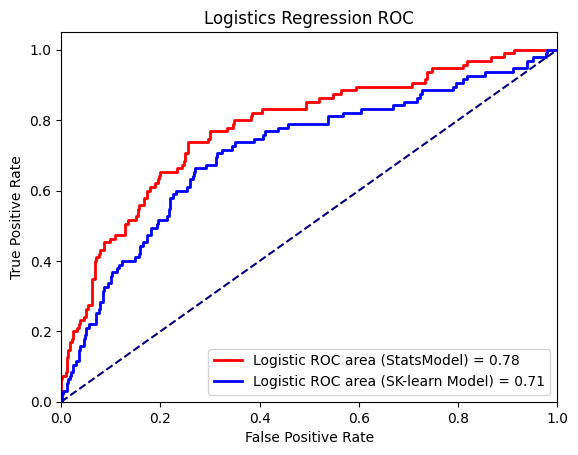

In [38]:
plt.figure()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1], color = 'navy', linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Logistics Regression ROC')
plt.plot(fpr_sm,tpr_sm,color = 'red', lw = 2, label = 'Logistic ROC area (StatsModel) = %0.2f' %roc_auc_sm)
plt.plot(fpr,tpr,color = 'blue', lw = 2, label = 'Logistic ROC area (SK-learn Model) = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.show()

In [39]:
# For comparision, we will build another model and this time we will pick some particular columns just by intuition
cols = ['Total day calls', 'Total eve minutes', 'Customer service calls', 'International plan', 'Number vmail messages']
X_tr = X_train[cols]
X_te = X_test[cols]
X_tr.columns

Index(['Total day calls', 'Total eve minutes', 'Customer service calls',
       'International plan', 'Number vmail messages'],
      dtype='object')

In [40]:
# Training the sk learn model on handpicked columns
logmodel = LogisticRegression()
logmodel.fit(X_tr, y_train)

LogisticRegression()

In [41]:
# We don't see the warning this time, shows multicollinearity has been taken care of.
logmodel.coef_

array([[ 0.00497016,  0.00646969,  0.44929149,  1.89982773, -0.02916594]])

In [42]:
coef = np.array(logmodel.coef_)
coef = coef.reshape([len(cols),])
var_coef = pd.DataFrame({'Vars': cols, 'coef': coef})
var_coef['odds_ratio'] = np.exp(var_coef['coef'])
var_coef

Vars      coef  odds_ratio
0         Total day calls  0.004970    1.004983
1       Total eve minutes  0.006470    1.006491
2  Customer service calls  0.449291    1.567201
3      International plan  1.899828    6.684743
4   Number vmail messages -0.029166    0.971255

### *Observation -*
- Odds ratio of "International Plan" is very high, suggesting that the impact of this variable is much more on the target variable compare to other variables
- People having international plan  are more likely to leave the service, hence our target group is a little isolated now.
- Customer service calls also has odds ratio more than 1, suggesting people are more like to leave if the number of calls to customer service is high

In [44]:
# Effect of cutoff on model performance
pred = logmodel.predict(X_te) #Takes the default cutoff of 0.5
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred))
print("precision: ", precision_score(y_test, pred))
print("recall: ", recall_score(y_test, pred))

Confusion matrix: 
[[561  11]
 [ 84  11]]
precision:  0.5
recall:  0.11578947368421053


In [45]:
# Changing the cutoff to 0.3
prob = logmodel.predict_proba(X_te)
pred_new = np.where(prob[:,1] > 0.3, 1, 0)
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred_new))
print("precision: ", precision_score(y_test, pred_new))
print("recall: ", recall_score(y_test, pred_new))

Confusion matrix: 
[[530  42]
 [ 63  32]]
precision:  0.43243243243243246
recall:  0.3368421052631579


In [46]:
# Recall score has improved on changing the cut-off

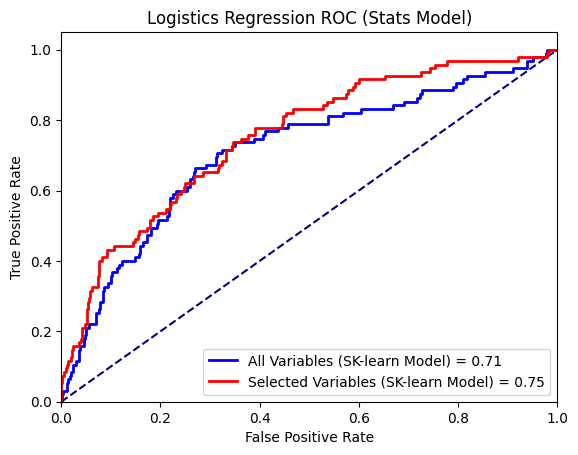

In [47]:
fpr_new, tpr_new, treshholds = roc_curve(y_test, prob[:,1], pos_label=1)
roc_auc_new = auc(fpr_new,tpr_new)
plt.figure()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1], color = 'navy', linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Logistics Regression ROC (Stats Model)')
plt.plot(fpr,tpr,color = 'blue', lw = 2, label = 'All Variables (SK-learn Model) = %0.2f' %roc_auc)
plt.plot(fpr_new,tpr_new,color = 'red', lw = 2, label = 'Selected Variables (SK-learn Model) = %0.2f' %roc_auc_new)
plt.legend(loc = 'lower right')
plt.show()

Dropping few columns has increased the model performance slightly suggesting that the multicollinearity was causing trouble

What is the ideal cut-off?
- This can be found from the recall-precision curve


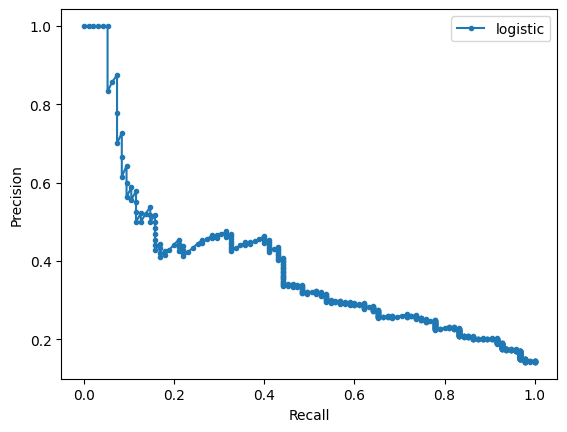

In [50]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test,prob[:,1])
plt.plot(recall, precision, marker = '.', label = 'logistic')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

- According to our business demand, the trade-off between recall and precision can be made
- For this model, the sweet spot is around 0.35 for Recall

### Making business decisions
- isolating high risk customers

In [53]:
chart_data = X_test[cols]
chart_data["Probability"] = prob[:,1]
chart_data = chart_data.sort_values(by = "Probability", ascending= False)
chart_data.head()

C:\Users\Ankur\AppData\Local\Temp\ipykernel_5660\3002888890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data["Probability"] = prob[:,1]


Total day calls  Total eve minutes  Customer service calls  \
2202              106              363.7                       5   
2595              112              131.7                       5   
2918               95              209.5                       5   
2656              101              196.4                       4   
1515              125              169.1                       8   

      International plan  Number vmail messages  Probability  
2202                   1                      0     0.924695  
2595                   1                      0     0.738228  
2918                   1                     15     0.734610  
2656                   1                      0     0.721397  
1515                   0                      0     0.688133

In [54]:
chart_data["decile"] = pd.qcut(chart_data["Probability"], 10)
chart_data.head()

Total day calls  Total eve minutes  Customer service calls  \
2202              106              363.7                       5   
2595              112              131.7                       5   
2918               95              209.5                       5   
2656              101              196.4                       4   
1515              125              169.1                       8   

      International plan  Number vmail messages  Probability         decile  
2202                   1                      0     0.924695  (0.32, 0.925]  
2595                   1                      0     0.738228  (0.32, 0.925]  
2918                   1                     15     0.734610  (0.32, 0.925]  
2656                   1                      0     0.721397  (0.32, 0.925]  
1515                   0                      0     0.688133  (0.32, 0.925]

In [55]:
chart_data["row"] = np.arange(1, chart_data.shape[0]+1)
chart_data["decile1"] = np.ceil(chart_data["row"]/((chart_data.shape[0]+1)/10))

In [56]:
chart_data

Total day calls  Total eve minutes  Customer service calls  \
2202              106              363.7                       5   
2595              112              131.7                       5   
2918               95              209.5                       5   
2656              101              196.4                       4   
1515              125              169.1                       8   
...               ...                ...                     ...   
2229               85              150.1                       1   
3044               82              159.7                       0   
2183               58              124.7                       0   
517               122              101.3                       0   
203               102              102.2                       0   

      International plan  Number vmail messages  Probability  \
2202                   1                      0     0.924695   
2595                   1                      0     0.738228   
2918                   1                     15     0.734610   
2656                   1                      0     0.721397   
1515                   0                      0     0.688133   
...                  ...                    ...          ...   
2229                   0                     44     0.018731   
3044                   0                     42     0.013355   
2183                   0                     31     0.013031   
517                    0                     39     0.012201   
203                    0                     37     0.011783   

                decile  row  decile1  
2202     (0.32, 0.925]    1      1.0  
2595     (0.32, 0.925]    2      1.0  
2918     (0.32, 0.925]    3      1.0  
2656     (0.32, 0.925]    4      1.0  
1515     (0.32, 0.925]    5      1.0  
...                ...  ...      ...  
2229  (0.0108, 0.0383]  663     10.0  
3044  (0.0108, 0.0383]  664     10.0  
2183  (0.0108, 0.0383]  665     10.0  
517   (0.0108, 0.0383]  666     10.0  
203   (0.0108, 0.0383]  667     10.0  

[667 rows x 9 columns]

In [62]:
chart_data["target"] = y_test
lift = chart_data.groupby('decile1').agg(
[
    'count', #The total number of customers(data points) in the decile
    'sum', #Total number of bad customers (Risk = 1)
]
)['target'].sort_index(ascending = True)
lift.columns = ["Number of customers", 'Number of left']
lift['Cummulative left'] = lift['Number of left'].cumsum() #cummulative sum of the number of bads
# Gain  = Cummulative percent of events / bads
lift['Percent of Events'] = lift['Number of left']/lift['Number of left'].sum()*100
lift['Gain'] = lift['Percent of Events'].cumsum()
#Calculate lift = Ratio of bads to the number of data points in the decile
lift['Lift'] = lift['Gain']/np.array(range(10,100+10,10))
lift

C:\Users\Ankur\AppData\Local\Temp\ipykernel_5660\2413334670.py:2: FutureWarning: ['decile'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  lift = chart_data.groupby('decile1').agg(


Number of customers  Number of left  Cummulative left  \
decile1                                                          
1.0                       66              31                31   
2.0                       67              14                45   
3.0                       67              13                58   
4.0                       67              11                69   
5.0                       67               8                77   
6.0                       66               5                82   
7.0                       67               6                88   
8.0                       67               3                91   
9.0                       67               1                92   
10.0                      66               3                95   

         Percent of Events        Gain      Lift  
decile1                                           
1.0              32.631579   32.631579  3.263158  
2.0              14.736842   47.368421  2.368421  
3.0              13.684211   61.052632  2.035088  
4.0              11.578947   72.631579  1.815789  
5.0               8.421053   81.052632  1.621053  
6.0               5.263158   86.315789  1.438596  
7.0               6.315789   92.631579  1.323308  
8.0               3.157895   95.789474  1.197368  
9.0               1.052632   96.842105  1.076023  
10.0              3.157895  100.000000  1.000000

### *Observation* - 
1. We sort the data points in decreasing order of their associated probabilities of being at risk (=1)
2. Cutinng the test data in deciles would help us in isolating the high risk customers so targetting them becomes easy.
3. On avaerage there were around 14% customers that churned. But here in the top decile we have 3.2 times more indicate by lift.
    - Lift = target response(Benchmark)/average responce

- In the top 4 deciles, we cover 72.63% percent of high risk customers from our test data.

## Result -
- We can see in the plot how we have isolated the high risk customers in the top deciles. (Indicated by Orange bar)

<AxesSubplot:xlabel='decile1', ylabel='count'>

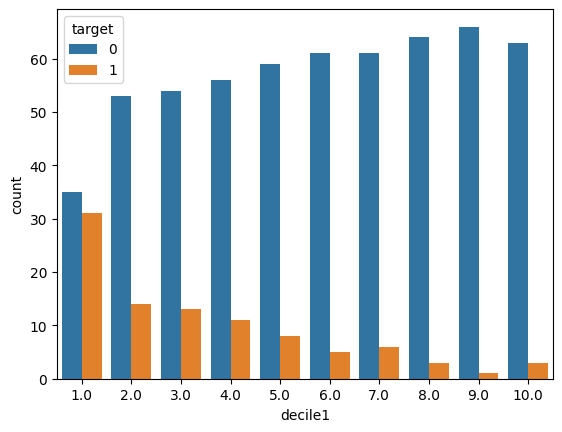

In [64]:
sns.countplot(x = 'decile1', hue = 'target', data = chart_data)